PEbFG § 8 (1) Öffentlicher Personennahverkehr im Sinne dieses Gesetzes ist die allgemein zugängliche Beförderung von Personen mit Straßenbahnen, Obussen und Kraftfahrzeugen im Linienverkehr, die überwiegend dazu bestimmt sind, die Verkehrsnachfrage im Stadt-, Vorort- oder Regionalverkehr zu befriedigen. Das ist im Zweifel der Fall, wenn in der Mehrzahl der Beförderungsfälle eines Verkehrsmittels die gesamte Reiseweite 50 Kilometer oder die gesamte Reisezeit eine Stunde nicht übersteigt.

In [1]:
# load libraries
import pandas as pd
import os, re
import datetime as dt
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, shape, Polygon

# from dask import dataframe as dd

ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed


In [2]:
zippath = "../../data/raw/delfi/20220419_fahrplaene_gesamtdeutschland_gtfs.zip"
file = zipfile.ZipFile(zippath)

## Agenturen

In [52]:
agencies = pd.read_csv(zipfile.ZipFile(zippath
                        ).open("agency.txt"))

In [53]:
agencies

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,7489,WestEnergie und Verkehr GmbH & Co KG,https://www.delfi.de,Europe/Berlin,NaN,NaN
1,7493,Rurseeschifffahrt,https://www.delfi.de,Europe/Berlin,NaN,NaN
2,7499,OMNIBUS,https://www.delfi.de,Europe/Berlin,NaN,NaN
3,7500,STRASSENBAHN,https://www.delfi.de,Europe/Berlin,NaN,NaN
4,7501,SONDERVERKEHRE,https://www.delfi.de,Europe/Berlin,NaN,NaN
...,...,...,...,...,...,...
1102,14066,NVVSEV,https://www.delfi.de,Europe/Berlin,NaN,NaN
1103,14082,Ilmebahn GmbH,https://www.delfi.de,Europe/Berlin,NaN,NaN
1104,14083,Scheithauer & Weihrauch GbR,https://www.delfi.de,Europe/Berlin,NaN,NaN
1105,14084,Verkehrsgesellschaft Südniedersachsen mbH,https://www.delfi.de,Europe/Berlin,NaN,NaN


In [54]:
sum(agencies.agency_name.str.contains("DB"))

35

In [55]:
agencies[agencies.agency_name.str.contains("DB")]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
207,7872,DB-Nahverkehr,https://www.delfi.de,Europe/Berlin,NaN,NaN
338,8142,DBZugBus RAB GmbH [Bus],https://www.delfi.de,Europe/Berlin,NaN,NaN
389,8574,DB Regio Bus Ost GmbH,https://www.delfi.de,Europe/Berlin,NaN,NaN
533,9287,DB Regio Bus Mitte,https://www.delfi.de,Europe/Berlin,NaN,NaN
620,10371,DB Regio AG,https://www.delfi.de,Europe/Berlin,NaN,NaN
625,10393,DB Fernverkehr Bus,https://www.delfi.de,Europe/Berlin,NaN,NaN
626,10434,DB Regio AG Nordost,https://www.delfi.de,Europe/Berlin,NaN,NaN
627,10435,DB Regio AG Nord,https://www.delfi.de,Europe/Berlin,NaN,NaN
628,10436,DB Regio AG NRW,https://www.delfi.de,Europe/Berlin,NaN,NaN
629,10437,DB Regio AG Südost,https://www.delfi.de,Europe/Berlin,NaN,NaN


In [18]:
sum(agencies.agency_name.str.contains("Bahn"))

31

In [19]:
sum(agencies.agency_name.str.contains("Deutsche"))

1

In [20]:
agencies[agencies.agency_name.str.contains("Deutsche")]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
676,10885,Köln-Düsseldorfer Deutsche Rheinschifffahrt AG,https://www.delfi.de,Europe/Berlin,NaN,NaN


In [21]:
sum(agencies.agency_name.str.contains("Bahn"))

31

In [22]:
agencies[agencies.agency_name.str.contains("Bahn")]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
31,7571,Bahnen der Stadt Monheim,https://www.delfi.de,Europe/Berlin,NaN,NaN
59,7631,Dortmunder Stadtwerke U-Bahn,https://www.delfi.de,Europe/Berlin,NaN,NaN
66,7638,"Essener Verkehrs AG, U-Bahn",https://www.delfi.de,Europe/Berlin,NaN,NaN
86,7676,SEV R+S (R-Bahn + S-Bahn),https://www.delfi.de,Europe/Berlin,NaN,NaN
193,7854,Bahnersatzverkehr,https://www.delfi.de,Europe/Berlin,NaN,NaN
322,8118,U-Bahn München,https://www.delfi.de,Europe/Berlin,NaN,NaN
386,8566,S-Bahn Berlin GmbH,https://www.delfi.de,Europe/Berlin,NaN,NaN
418,8654,Erfurter Bahn,https://www.delfi.de,Europe/Berlin,NaN,NaN
621,10375,S-Bahn Hamburg,https://www.delfi.de,Europe/Berlin,NaN,NaN
661,10851,City-Bahn Chemnitz,https://www.delfi.de,Europe/Berlin,NaN,NaN


In [23]:
sum(agencies.agency_name.str.contains("Flix"))

3

In [24]:
agencies[agencies.agency_name.str.contains("Flix")]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
876,12636,FlixTrain,https://www.delfi.de,Europe/Berlin,NaN,NaN
1071,13794,FlixBus-de,https://www.delfi.de,Europe/Berlin,NaN,NaN
1072,13796,FlixTrain-de,https://www.delfi.de,Europe/Berlin,NaN,NaN


In [68]:
agencies[agencies.agency_name.str.contains("Fernverkehr|Flix")]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
625,10393,DB Fernverkehr Bus,https://www.delfi.de,Europe/Berlin,NaN,NaN
696,10918,DB Fernverkehr (Codesharing),https://www.delfi.de,Europe/Berlin,NaN,NaN
876,12636,FlixTrain,https://www.delfi.de,Europe/Berlin,NaN,NaN
879,12681,DB Fernverkehr AG,https://www.delfi.de,Europe/Berlin,NaN,NaN
1071,13794,FlixBus-de,https://www.delfi.de,Europe/Berlin,NaN,NaN
1072,13796,FlixTrain-de,https://www.delfi.de,Europe/Berlin,NaN,NaN


In [70]:
fv_agencies = agencies[agencies.agency_name.str.contains("Fernverkehr|Flix")]
print(fv_agencies.agency_name)

625               DB Fernverkehr Bus
696     DB Fernverkehr (Codesharing)
876                        FlixTrain
879                DB Fernverkehr AG
1071                      FlixBus-de
1072                    FlixTrain-de
Name: agency_name, dtype: object


## Routen

In [27]:
routes = pd.read_csv(file.open("routes.txt"))

In [28]:
routes

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color,route_desc
0,3475809_3,8583,497,NaN,3,NaN,NaN,NaN
1,2794462_3,8583,446,NaN,3,NaN,NaN,NaN
2,232707_3,8583,496,NaN,3,NaN,NaN,NaN
3,20490_3,8583,531,NaN,3,NaN,NaN,NaN
4,20481_3,8583,519,NaN,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
25097,3353479_3,13121,104,NaN,3,NaN,NaN,NaN
25098,3353478_3,13121,103,NaN,3,NaN,NaN,NaN
25099,3353477_3,13121,102,NaN,3,NaN,NaN,NaN
25100,3353476_3,13121,101,NaN,3,NaN,NaN,NaN


In [74]:
fv_routes = routes[routes.agency_id.isin(fv_agencies.agency_id)]
print("Anzahl Ferverkehrsrouten: " + str(len(fv_routes)))

Anzahl Ferverkehrsrouten: 319


## Shapes

German boundary to clip by

In [3]:
# Germany bounding box
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('epsg:3035')
germany = world.copy()[world.name == "Germany"] 
germany['geometry'] = germany.geometry.buffer(50000)#50k buffer

In [4]:
shapes = pd.read_csv(file.open("shapes.txt"))

In [5]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,748,52.833013,13.798323,0
1,748,52.833535,13.804484,1
2,748,52.833535,13.804484,2
3,748,52.833764,13.811143,3
4,748,52.833764,13.811143,4


In [6]:
# shapes = shapes[shapes.shape_id.isin(shapes.shape_id.unique()[:100])]

In [7]:
len(shapes)

8442324

In [8]:
#zip the coordinates into a point object and convert to a GeoData Frame
geometry = [Point(xy) for xy in zip(shapes.shape_pt_lon, shapes.shape_pt_lat)]

Clip by Germany

In [9]:
%%time 
shapes_geo = gpd.GeoDataFrame(shapes, 
                          geometry=geometry, 
                          crs="epsg:4326"
                        ).to_crs("epsg:3035"
                        ).clip(germany
                        ).sort_values(['shape_id','shape_pt_sequence'])

In [ ]:
shapes_geo.plot()

Lines for each route: grouping by shape_id and then turning all the points into lines

### Whole route length

In [ ]:
shapes_geo2 = gpd.GeoDataFrame(
                shapes_geo.groupby('shape_id'
                        )['geometry'
                        ].apply(lambda x: LineString(x.tolist())
                        ),
                geometry='geometry',
                crs="epsg:3035"
)

In [ ]:
shapes_geo2.crs = "epsg:3035"

In [ ]:
shapes_geo2.length

In [ ]:
shapes_geo2['length'] = shapes_geo2.geometry.length

In [ ]:
print(len(shapes_geo2))
print(shapes_geo2.crs)

In [ ]:
shapes_geo2.plot("length")

In [ ]:
# import importlib 
# importlib.reload(plt)
# sys.modules.pop(matplotlib)
# import matplotlib.pyplot as plt
shapes_geo2.hist('length', bins=10000)
plt.xlim(0,900000) # D misst knapp 900 km Nord-Süd

In [ ]:
shapes_geo2[shapes_geo2.length<100000].hist('length', bins=100)

Wie wäre es mit durchschnittlichem Abstand zw. Haltestellen?

## Stops on routes

Use list comprehension on the relevant columns, shifted by one

In [12]:
def makeSegments_list(df):
    df = df.copy()
    segments= [LineString((r[0],r[1])) if r[2]==r[3] else pd.NA for r in zip(df.geometry, df.geometry[1:], df.shape_id, df.shape_id[1:])]
    segments = segments + [pd.NA]
    # df['segment'] = pd.array(segments)
    gdf = gpd.GeoDataFrame(df, geometry=segments, crs="epsg:3035")
    gdf = gdf.dropna(axis=0,subset=["geometry"])
    return gdf[['shape_id','geometry']]
#segments_df = gpd.GeoDataFrame(df, geometry = segments, crs = 'epsg:3035')

Try doing it using pandas built-in:

In [113]:
def makeSegments_pd(df):
    df = df.copy()
    
    df['next_geom'] = df.geometry.shift(-1)
    df['next_id'] = df.shape_id.shift(-1)

    def makeSegment(row):
        if (row['shape_id']==row['next_id']):
            return LineString((row['geometry'], row['next_geom']))
        else:
            return(pd.NA)
    
    gdf = gpd.GeoDataFrame(df, geometry=segments, crs="epsg:3035")
    gdf = gdf.dropna(axis=0,subset=["geometry"])
    # df['segment'] = df[['geometry','next_geom','shape_id','next_id']
    #                   ].apply(makeSegment,axis=1
    #                   )
    # df = df.dropna(axis=0,subset=['segment'])
    
    return gdf[['shape_id', 'geometry']]

### Testing on smaller subset

In [93]:
df = shapes_geo.head(1000)

In [94]:
df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,geometry
3223874,80778,53.744078,14.261905,2,POINT (4602042.867 3412345.685)
3223873,80778,53.744078,14.261905,1,POINT (4602042.867 3412345.685)
3224318,80752,53.744078,14.261905,54,POINT (4602042.867 3412345.685)
3223802,80780,53.744078,14.261905,2,POINT (4602042.867 3412345.685)
3224523,80763,53.744934,14.248457,61,POINT (4601151.588 3412388.713)


In [114]:
%timeit makeSegments_list(df)

15.8 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [115]:
%timeit makeSegments_pd(df)

21.8 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Finally, using `swifter`, which is supposed to make `apply` faster:

In [100]:
import swifter

In [116]:
def makeSegments_swifter(df):
    df = df.copy()
    
    df['next_geom'] = df.geometry.shift(-1)
    df['next_id'] = df.shape_id.shift(-1)

    def makeSegment(row):
        if (row['shape_id']==row['next_id']):
            return LineString((row['geometry'], row['next_geom']))
        else:
            return(pd.NA)

    segments = df[['geometry','next_geom','shape_id','next_id']
                      ].swifter.progress_bar(False).apply(makeSegment,axis=1
                      )
    
    gdf = gpd.GeoDataFrame(df, geometry=segments, crs="epsg:3035")
    gdf = gdf.dropna(axis=0,subset=["geometry"])
    # df = df.dropna(axis=0,subset=['segment'])
    
    return gdf[['shape_id', 'geometry']]

In [117]:
%timeit makeSegments_swifter(df)

36.8 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Run fastest option on whole set

In [13]:
%time segments_geo = makeSegments_list(shapes_geo)

CPU times: user 7min 2s, sys: 11.7 s, total: 7min 13s
Wall time: 7min 13s


In [ ]:
%time segments_geo = makeSegments_swifter(shapes_geo)

ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.conda/envs/geo-env/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-maita.schade/.co

In [14]:
segments_geo.head()

,shape_id,geometry
25020,1,"LINESTRING (4578498.608 3363970.626, 4578367.6..."
25021,1,"LINESTRING (4578367.645 3363612.303, 4578367.6..."
25022,1,"LINESTRING (4578367.645 3363612.303, 4577978.9..."
25023,1,"LINESTRING (4577978.967 3363110.627, 4577978.9..."
25024,1,"LINESTRING (4577978.967 3363110.627, 4573661.5..."


In [ ]:
#%time segments_geo = gpd.GeoDataFrame(segments_df, geometry=segments_df.segment, crs="epsg:3035")

In [16]:
%time segments_geo['length'] = segments_geo.copy().length

CPU times: user 13.1 s, sys: 480 ms, total: 13.6 s
Wall time: 13.6 s


In [21]:
segments_geo_nn = segments_geo.copy()[segments_geo.length>0]

In [22]:
len(segments_geo_nn)/len(segments_geo)

0.56359997227473

In [23]:
%time shape_segment_chars = segments_geo_nn.groupby('shape_id').length.agg(['max','min','mean','median', 'std'])

CPU times: user 351 ms, sys: 20.1 ms, total: 371 ms
Wall time: 371 ms


In [24]:
shape_segment_chars

,max,min,mean,median,std
shape_id,,,,,
1,6450.913486,381.505686,2324.731800,1995.191476,1848.719334
2,6450.913486,340.092167,1951.784070,508.065312,3002.243532
3,6450.913486,46.675815,1479.629539,1227.389468,1409.852907
4,6450.913486,372.234623,1665.005369,1287.501797,1632.178570
5,6450.913486,381.505686,2201.009690,1970.544446,1655.004919
...,...,...,...,...,...
241553,3159.222478,234.689519,1030.163069,806.072458,681.268495
241554,3148.950688,221.137247,1032.630348,795.916578,737.672974
241555,3148.950688,221.137247,1013.692250,795.916578,728.478887


array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

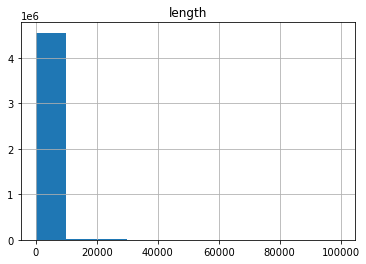

In [26]:
segments_geo_nn[segments_geo_nn.length<100000].hist("length")

## Fernverkehr Anzahl

Was ist mit denen, wo wir wissen dass sie FV sind?

In [77]:
trips = pd.read_csv(file.open("trips.txt"))

/tmp/ipykernel_1869436/3094825812.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv(file.open("trips.txt"))


In [78]:
trips[trips.route_id.isin(fv_routes.route_id)]

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
204740,3594735_3,2409,1713415513,Amsterdam Sloterdijk,NaN,0,NaN,27688,0,0
204741,3594735_3,2409,1713415508,Karlsruhe Hauptbahnhof Süd,NaN,0,NaN,27689,0,0
204742,3594734_3,1170,1713415382,ZOB,NaN,0,NaN,27687,0,0
204743,3594734_3,2410,1713415375,ZOB,NaN,0,NaN,27687,0,0
204744,3594734_3,2411,1713415368,ZOB,NaN,0,NaN,27687,0,0
...,...,...,...,...,...,...,...,...,...,...
1751943,3594736_2,23355,1713415543,Stuttgart Hauptbf (Arnulf-Klett-Platz),NaN,0,NaN,230023,0,0
1751944,3594736_2,1773,1713415525,Stuttgart Hauptbf (Arnulf-Klett-Platz),NaN,0,NaN,230025,0,0
1751945,3594736_2,1798,1713415524,Stuttgart Hauptbf (Arnulf-Klett-Platz),NaN,0,NaN,230025,0,0
1751946,3594736_2,23335,1713415518,Stuttgart Hauptbf (Arnulf-Klett-Platz),NaN,0,NaN,230025,0,0


In [79]:
fv_chars = shape_segment_chars[
    shape_segment_chars.index.isin((trips[trips.route_id.isin(fv_routes.route_id)
                                            ]
                                      ).shape_id)]

In [80]:
fv_chars_agency = shape_segment_chars[
    shape_segment_chars.index.isin(
        trips[trips.route_id.isin(
            routes[routes.agency_id.isin(
                agencies[agencies.agency_name.str.contains("Fernverkehr|Flix") 
                        ].agency_id
            )].route_id
        )].shape_id
    )]                 
        

In [85]:
fv_chars_agency

,max,min,mean,median,std
shape_id,,,,,
26919,164629.924219,25766.228151,97639.772229,102523.164317,69560.528751
26920,164629.924219,25766.228151,97639.772229,102523.164317,69560.528751
26921,164629.924219,3663.597364,49248.091102,15880.178256,67978.950093
26922,164629.924219,3663.597364,49248.091102,15880.178256,67978.950093
26923,190080.262145,11125.020171,60512.794809,37948.332469,65602.261699
...,...,...,...,...,...
230065,250005.823793,5032.996383,87417.948154,7215.024285,140809.457389
230066,250005.823793,5032.996383,127519.410088,127519.410088,173221.947468
230067,202093.215599,5557.226027,80747.931359,41819.378833,87311.085242


<AxesSubplot:>

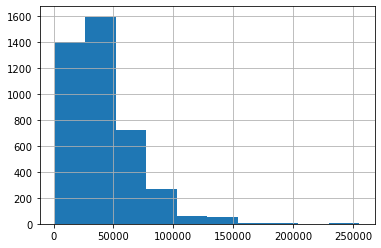

In [82]:
fv_chars['median'].hist()

<AxesSubplot:>

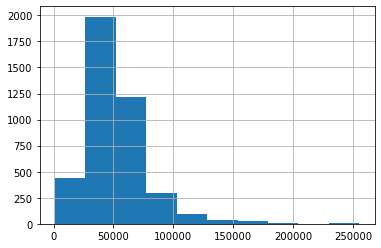

In [83]:
fv_chars['mean'].hist()

<AxesSubplot:>

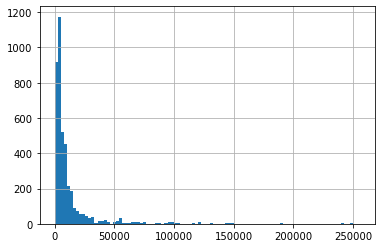

In [84]:
fv_chars['min'].hist(bins=100)

In [50]:
fv_chars['median'].median()

31201.007064336467

In [51]:
fv_chars['median'].std()

27015.27514473212

# Möglichkeiten

1. Nur über Agenturen: DB Fernverkehr, DB Fernverkehr Bus, und Flix
2. über statistische Merkmale. Schwierig, da std sehr groß

Ich bin für 1. _Allerdings_ gehen dabei einige verloren.

Evtl. Kombo-Möglichkeit:
- Fernverkehr + Flix
- Routen, deren mediane Segmentlänge >25k, oder so
- sind immer noch ziemlich wenige Trips glaube ich...